# Explore here

It's recommended to use this notebook for exploration purposes.

### Importar Librerias

In [1]:
import os
import sqlalchemy as db
from sqlalchemy import *
import random
from bs4 import BeautifulSoup
import requests
import time
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import csv
import re

warnings.filterwarnings('ignore')
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option('display.max_colwidth', 300)
# set seed for reproducibility
np.random.seed(0)

### Paso 2: Descargar HTML

In [2]:
response = requests.get("https://ycharts.com/companies/TSLA/revenues")

if response.status_code == 200:
    print("The web page responded with status code 200 (OK)")
else:
    print(f"The web page responded with status code {response.status_code}")

The web page responded with status code 403


In [3]:
# Manejo del error 403

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
}

for i in range(5):
    try:
        response = requests.get('https://ycharts.com/companies/TSLA/revenues', headers=headers)
        #response.raise_for_status()
        datos_htlm=response.text
        soup = BeautifulSoup(datos_htlm, 'html.parser')
        with open("tesla_rev.html", "wb") as dataset:
            dataset.write(response.content)
        break
    except requests.exceptions.HTTPError as e:
        if e.response.status_code == 403:
            print(f"Request failed with status code {e.response.status_code}. Retrying...")
            headers['User-Agent'] = headers['User-Agent'].replace('Chrome/58.0.3029.110', f'Chrome/{random.randint(50, 60)}.{random.randint(0, 100)}.{random.randint(0, 100)}')
        else:
            raise



## Primer Metodo Empleado: Se usa la libreria BeautifulSoup para generar la variable soup

#### Se genera una lista con la informacion de las tablas extraidas con la variable soup, cargada en el momento de hacer el Web Scraping.Finalmente se envia a un archivo .csv para posterior analisis con PANDAS

In [4]:
tablas_s = soup.find_all("table")

# Encontrar todas las filas de las tablas usando 'tr' tag
rows = soup.find_all('tr')

# Creando una lista de listas que contienen la data de cada columna
data = []
for row in rows:
    cols = row.find_all('td')   # Encuentra las columnas que tienen etiquetas
    row_data = [col.text for col in cols]
    data.append(row_data)

# Vamos a enviar la lista a un archivo .csv para poder abrirlo con PANDAS aprovechando su versatilidad

with open('data_prov.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(data)

#### Vamos a Crear un Dataframe con el archivo .csv exportado. Aprovechamos de asignar nombres a las columnas, eliminar registros que no nos interesan, espacios en blanco de las columnas, generamos una columna tipo fecha para poder ordenar los registros, entre otras cosas

In [5]:
# Create a DataFrame from data_prov.csv

Revenue1 = pd.read_csv('C:/Users/gfern/OneDrive/Escritorio/4GeeksAcademy/web-scraping-project-tutorial/src/data_prov.csv',names=['Fecha','Valores'],nrows=50 )
Revenue1['Valores']=Revenue1['Valores'].str.strip()
Revenue1['Fecha_Analizada']=pd.to_datetime(Revenue1['Fecha'],format="%B %d, %Y")
Revenue1


,Fecha,Valores,Fecha_Analizada
0,"March 31, 2024",21.30B,2024-03-31
1,"December 31, 2023",25.17B,2023-12-31
2,"September 30, 2023",23.35B,2023-09-30
3,"June 30, 2023",24.93B,2023-06-30
4,"March 31, 2023",23.33B,2023-03-31
5,"December 31, 2022",24.32B,2022-12-31
6,"September 30, 2022",21.45B,2022-09-30
7,"June 30, 2022",16.93B,2022-06-30
8,"March 31, 2022",18.76B,2022-03-31
9,"December 31, 2021",17.72B,2021-12-31


## Segundo Metodo Empleado: Directamente se usa PANDAS con la funcion read_htlm

#### Se encontraron 4 tablas a traves de la Libreria de PANDAS, cuando se leyo el archivo tesla_rev.htlm. Se uso el siguiente codigo:

In [6]:
tablas=pd.read_html('C:/Users/gfern/OneDrive/Escritorio/4GeeksAcademy/web-scraping-project-tutorial/src/tesla_rev.html')
for i,tabla in enumerate(tablas):
    tabla.to_csv(f'tabla_{i}.csv', index=True)
print(f'Se encontraron {i+1} tablas a traves del Web Scraping, fueron extraidas con PANDAS')

Se encontraron 4 tablas a traves del Web Scraping, fueron extraidas con PANDAS


#### Solo nos interesan dos tablas, cuando se concatenan nos muestran la evolucion trimestral de TESLA desde el ultimo trimestre del 2011 hasta el primer trimestre del 2024.

In [7]:
# Encuentro tablas y las convierto en archivos .CSV, usando la facilidad de lectura de archivos .htlm de Pandas

df1=pd.read_csv('C:/Users/gfern/OneDrive/Escritorio/4GeeksAcademy/web-scraping-project-tutorial/src/tabla_1.csv',usecols=["Date","Value"], nrows=26)
df2=pd.read_csv('C:/Users/gfern/OneDrive/Escritorio/4GeeksAcademy/web-scraping-project-tutorial/src/tabla_0.csv',usecols=["Date","Value"],nrows=26)
Revenue=pd.concat([df1,df2], ignore_index=True)
Revenue

,Date,Value
0,"December 31, 2017",3.288B
1,"September 30, 2017",2.985B
2,"June 30, 2017",2.790B
3,"March 31, 2017",2.696B
4,"December 31, 2016",2.285B
5,"September 30, 2016",2.298B
6,"June 30, 2016",1.270B
7,"March 31, 2016",1.147B
8,"December 31, 2015",1.214B
9,"September 30, 2015",936.79M


#### En el siguiente código se realizan las siguientes actividades:

- Se crea la columna 'Fecha Analizada', tipo Datetime() para posteriores usos
- Se eliminan espacios en blanco de la Columna 'Value'
- Se crea el dataframe Revenue2 con los datos ordenados por fecha ascendente y se hace un reset a los indices
- Se crea la columna 'Value_Num' para obtener valores numericos eliminando las letras 'M' y 'B' de estas celdas
- Finalmente, se borran la columna con los indices anteriores 

In [8]:
Revenue['Fecha_Analizada'] = pd.to_datetime(Revenue['Date'], format="%B %d, %Y")
Revenue['Value'] = Revenue['Value'].str.strip()
Revenue2=Revenue.sort_values(by=['Fecha_Analizada'])
Revenue2=Revenue2.reset_index()
Revenue2=Revenue2.drop(['index'],axis=1)
Revenue2['Value_Num']=Revenue2['Value']


#### La siguiente rutina se usa para varias cosas:
- Cambiar las letras 'M' y 'N' en la columna 'Value_Num' por espacios vacios
- Cambiar progresivamente el tipo de formato en cada celda de la columna 'Value_Num' a un tipo float
- En el caso de las celdas con 'M', las multiplicamos por 1.000.000 y para las que contienen 'B', las multiplicamos por 1.000.000.000
- Listamos el dataframe para ver como queda...

In [9]:
val=(Revenue2['Value_Num'].dtype)

if val=='object':
  for index in range(len(Revenue2)):
        
    if "M" in Revenue2.loc[index,'Value']:
        Revenue2.loc[[index],'Value_Num']=Revenue2.loc[[index],'Value_Num'].apply(lambda x:re.sub(r'M','',x))
        Revenue2.loc[[index],'Value_Num']=Revenue2.loc[[index],'Value_Num'].astype(float)
        Revenue2.loc[[index],'Value_Num']=Revenue2.loc[[index],'Value_Num'].apply(lambda x:x*1000000)
    
    if "B" in Revenue2.loc[index,'Value']:
        Revenue2.loc[[index],'Value_Num']=Revenue2.loc[[index],'Value_Num'].apply(lambda x:re.sub(r'B','',x))
        Revenue2.loc[[index],'Value_Num']=Revenue2.loc[[index],'Value_Num'].astype(float)
        Revenue2.loc[[index],'Value_Num']=Revenue2.loc[[index],'Value_Num'].apply(lambda x:x*1000000000)

Revenue2['Value_Num']=Revenue2['Value_Num'].astype(float)
Revenue2


,Date,Value,Fecha_Analizada,Value_Num
0,"December 31, 2011",39.38M,2011-12-31,3.938000e+07
1,"March 31, 2012",30.17M,2012-03-31,3.017000e+07
2,"June 30, 2012",26.65M,2012-06-30,2.665000e+07
3,"September 30, 2012",50.10M,2012-09-30,5.010000e+07
4,"December 31, 2012",306.33M,2012-12-31,3.063300e+08
5,"March 31, 2013",561.79M,2013-03-31,5.617900e+08
6,"June 30, 2013",405.14M,2013-06-30,4.051400e+08
7,"September 30, 2013",431.35M,2013-09-30,4.313500e+08
8,"December 31, 2013",615.22M,2013-12-31,6.152200e+08
9,"March 31, 2014",620.54M,2014-03-31,6.205400e+08


#### A continuacion vamos a crear la base datos para guardar los valores encontrados en la pagina, usaremos Sqlite

In [10]:

engine = db.create_engine('sqlite:///tesla_revenues.sqlite')
connect=engine.connect()
connect.close()


#### En el siguiente codigo crearemos la tabla revenues_final para guardar los valores

In [11]:

metadata=db.MetaData()
revenues_final = db.Table('revenues_final', metadata,
              db.Column('Fecha', db.String(10),nullable=False),
              db.Column('Valores', db.Float, nullable=False),
              )
metadata.create_all(engine) 


#### Vamos a insertar los registros en la tabla creada y al final validamos que se hayan guardado en la tabla

In [12]:
tabla_f = Table('revenues_final', metadata, autoload_with=engine)
with engine.connect() as conn:
        result_f = engine.connect().execute(tabla_f.select())
        if not result_f.fetchall():
                datos_f=[{"Fecha": "31/12/2011", "Valores": 39380000},
                       {"Fecha": "31/03/2012", "Valores": 30170000},
                       {"Fecha": "30/06/2012", "Valores": 26650000},
                       {"Fecha": "30/09/2012", "Valores": 50100000},
                       {"Fecha": "31/12/2012", "Valores": 306330000},
                       {"Fecha": "31/03/2013", "Valores": 561790000},
                       {"Fecha": "30/06/2013", "Valores": 405140000},
                       {"Fecha": "30/09/2013", "Valores": 431350000},
                       {"Fecha": "31/12/2013", "Valores": 615220000},
                       {"Fecha": "31/03/2014", "Valores": 620540000},
                        {"Fecha": "30/06/2014", "Valores": 769350000},
                        {"Fecha": "30/09/2014", "Valores": 851800000},
                        {"Fecha": "31/12/2014", "Valores": 956660000},
                        {"Fecha": "31/03/2015", "Valores": 939880000},
                        {"Fecha": "30/06/2015", "Valores": 954980000},
                        {"Fecha": "30/09/2015", "Valores": 936790000},
                        {"Fecha": "31/12/2015", "Valores": 1214000000},
                        {"Fecha": "31/03/2016", "Valores": 1147000000},
                        {"Fecha": "30/06/2016", "Valores": 1270000000},
                        {"Fecha": "30/09/2016", "Valores": 2298000000},
                        {"Fecha": "31/12/2016", "Valores": 2285000000},
                        {"Fecha": "31/03/2017", "Valores": 2696000000},
                        {"Fecha": "30/06/2017", "Valores": 2790000000},
                        {"Fecha": "30/09/2017", "Valores": 2985000000},
                        {"Fecha": "31/12/2017", "Valores": 3288000000},
                        {"Fecha": "31/03/2018", "Valores": 3409000000},
                        {"Fecha": "30/06/2018", "Valores": 4002000000},
                        {"Fecha": "30/09/2018", "Valores": 6824000000},
                        {"Fecha": "31/12/2018", "Valores": 7226000000},
                        {"Fecha": "31/03/2019", "Valores": 4541000000},
                        {"Fecha": "30/06/2019", "Valores": 6350000000},
                        {"Fecha": "30/09/2019", "Valores": 6303000000},
                        {"Fecha": "31/12/2019", "Valores": 7384000000},
                        {"Fecha": "31/03/2020", "Valores": 5985000000},
                        {"Fecha": "30/06/2020", "Valores": 6036000000},
                        {"Fecha": "30/09/2020", "Valores": 8771000000},
                        {"Fecha": "31/12/2020", "Valores": 10740000000},
                        {"Fecha": "31/03/2021", "Valores": 10390000000},
                        {"Fecha": "30/06/2021", "Valores": 11960000000},
                        {"Fecha": "30/09/2021", "Valores": 13760000000},
                        {"Fecha": "31/12/2021", "Valores": 17720000000},
                        {"Fecha": "31/03/2022", "Valores": 18760000000},
                        {"Fecha": "30/06/2022", "Valores": 16930000000},
                        {"Fecha": "30/09/2022", "Valores": 21450000000},
                        {"Fecha": "31/12/2022", "Valores": 24320000000},
                        {"Fecha": "31/03/2023", "Valores": 23330000000},
                        {"Fecha": "30/06/2023", "Valores": 24930000000},
                        {"Fecha": "30/09/2023", "Valores": 23350000000},
                        {"Fecha": "31/12/2023", "Valores": 25170000000},
                        {"Fecha": "31/03/2024", "Valores": 21300000000},
                ]
                stmt_f = tabla_f.insert().values([dict(row) for row in datos_f])
                conn.execute(stmt_f)
                conn.commit()

res = engine.connect().execute(tabla_f.select())
for row in res:
        print(row)         

('31/12/2011', 39380000.0)
('31/03/2012', 30170000.0)
('30/06/2012', 26650000.0)
('30/09/2012', 50100000.0)
('31/12/2012', 306330000.0)
('31/03/2013', 561790000.0)
('30/06/2013', 405140000.0)
('30/09/2013', 431350000.0)
('31/12/2013', 615220000.0)
('31/03/2014', 620540000.0)
('30/06/2014', 769350000.0)
('30/09/2014', 851800000.0)
('31/12/2014', 956660000.0)
('31/03/2015', 939880000.0)
('30/06/2015', 954980000.0)
('30/09/2015', 936790000.0)
('31/12/2015', 1214000000.0)
('31/03/2016', 1147000000.0)
('30/06/2016', 1270000000.0)
('30/09/2016', 2298000000.0)
('31/12/2016', 2285000000.0)
('31/03/2017', 2696000000.0)
('30/06/2017', 2790000000.0)
('30/09/2017', 2985000000.0)
('31/12/2017', 3288000000.0)
('31/03/2018', 3409000000.0)
('30/06/2018', 4002000000.0)
('30/09/2018', 6824000000.0)
('31/12/2018', 7226000000.0)
('31/03/2019', 4541000000.0)
('30/06/2019', 6350000000.0)
('30/09/2019', 6303000000.0)
('31/12/2019', 7384000000.0)
('31/03/2020', 5985000000.0)
('30/06/2020', 6036000000.0)
('30/

#### Vamos a imprimir la tabla revenues_final desde Sqlite para garantizar que se grabaron los datos adecuadamente

In [13]:
connection = engine.connect()
query = 'SELECT * FROM revenues_final'
df = pd.read_sql(query, connection)
print(df)
connection.close()


         Fecha       Valores
0   31/12/2011  3.938000e+07
1   31/03/2012  3.017000e+07
2   30/06/2012  2.665000e+07
3   30/09/2012  5.010000e+07
4   31/12/2012  3.063300e+08
5   31/03/2013  5.617900e+08
6   30/06/2013  4.051400e+08
7   30/09/2013  4.313500e+08
8   31/12/2013  6.152200e+08
9   31/03/2014  6.205400e+08
10  30/06/2014  7.693500e+08
11  30/09/2014  8.518000e+08
12  31/12/2014  9.566600e+08
13  31/03/2015  9.398800e+08
14  30/06/2015  9.549800e+08
15  30/09/2015  9.367900e+08
16  31/12/2015  1.214000e+09
17  31/03/2016  1.147000e+09
18  30/06/2016  1.270000e+09
19  30/09/2016  2.298000e+09
20  31/12/2016  2.285000e+09
21  31/03/2017  2.696000e+09
22  30/06/2017  2.790000e+09
23  30/09/2017  2.985000e+09
24  31/12/2017  3.288000e+09
25  31/03/2018  3.409000e+09
26  30/06/2018  4.002000e+09
27  30/09/2018  6.824000e+09
28  31/12/2018  7.226000e+09
29  31/03/2019  4.541000e+09
30  30/06/2019  6.350000e+09
31  30/09/2019  6.303000e+09
32  31/12/2019  7.384000e+09
33  31/03/2020

### Vamos a visulizar los datos usando varios plots. Partiendo del Dataframe Revenue2

##### En el siguiente Grafico tipo Plot se puede observar que desde el 2011 hasta la presente fecha la Empresa TESLA ha mostrado un crecimiento sostenido, solo se observa correcciones leves en la tendencia mostrada

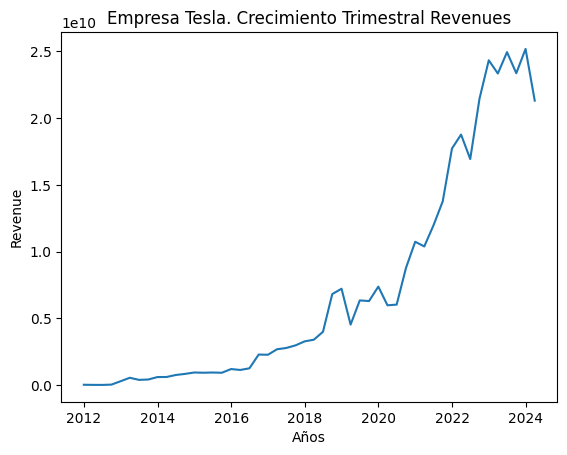

In [14]:
plt.plot(Revenue2["Fecha_Analizada"],Revenue2['Value_Num'])
plt.title('Empresa Tesla. Crecimiento Trimestral Revenues')
plt.xlabel('Años')
plt.ylabel('Revenue')
plt.show()


#### En el siguiente Pie Chart se observa que aproximadamente el 65% de los ingresos se obtuvieron durante los años 2021, 2022 y 2023. Se debe esperar el cierre del 2024 para ampliar el analisis.

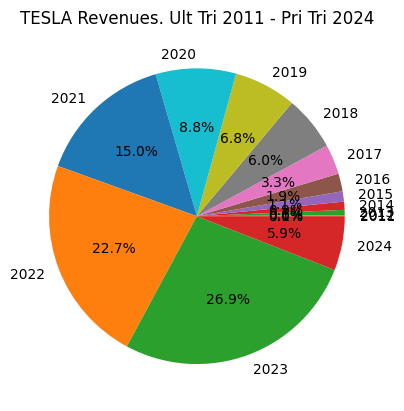

In [15]:
Revenue2['Year'] = Revenue2['Fecha_Analizada'].dt.year
revenue_year=Revenue2.groupby(['Year'])['Value_Num'].sum()
lst=revenue_year.tolist()
etiquetas=[]
for i in range(len(lst)):
    etiquetas.append(str(2011+i))

labels = etiquetas
sizes = lst
plt.pie(sizes, labels=labels,autopct='%1.1f%%')
plt.title('TESLA Revenues. Ult Tri 2011 - Pri Tri 2024')
plt.show()

#### Finalmente, se esta haciendo un Zoom sobre las ganancias obtenidas desde el 2021 hasta el primer trimestre del 2024, para ver los trimestres con mayor crecimiento y observar el desempeno del primer trimestre del 2024.

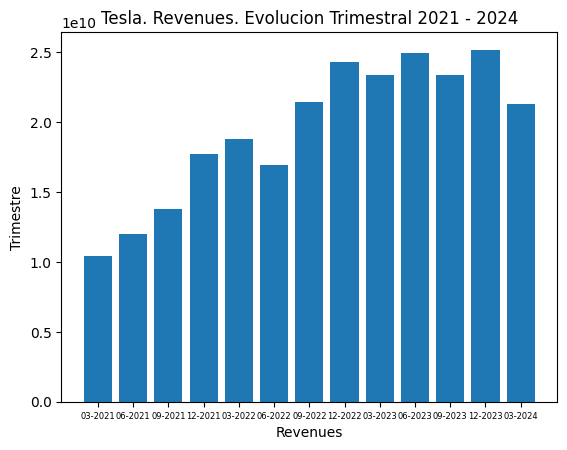

In [16]:
# Intervalo de Fechas 2020 - 2024

fecha_filter=Revenue2[Revenue2['Fecha_Analizada']>'31/12/2020']
fecha=fecha_filter['Fecha_Analizada'].dt.strftime('%m-%Y').tolist()
valor=fecha_filter['Value_Num'].tolist()

categories = fecha
values = valor

# create a bar chart
plt.bar(categories, values,width=0.8)

# add a title and labels
plt.title('Tesla. Revenues. Evolucion Trimestral 2021 - 2024')
plt.xlabel('Revenues')
plt.ylabel('Trimestre')
plt.xticks(fontsize=6)

# show the plot
plt.show()
